# LAB1 - image information

**objectives:**

* get familiar with development environment
* apply pixel level processing
* entropy and compression



## Image histogram



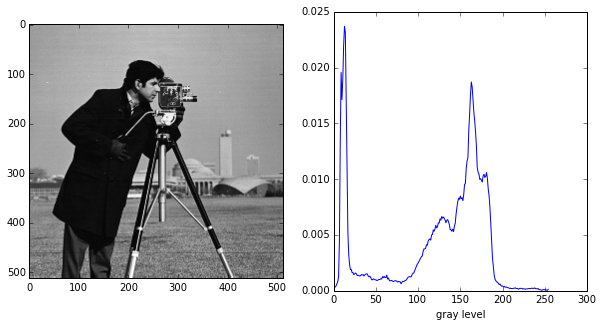

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.data import camera

plt.figure(figsize=[10,5])
ima = camera() #use a test image provided by the skimage library
hist,bins = np.histogram(ima.flatten(),range(256)) # histogram is computed on a 1D distribution --> flatten()
norm_hist = 1.*hist/np.sum(hist) # normalized histogram

# display the results
plt.subplot(1,2,1)
plt.imshow(camera(),cmap=cm.gray)
plt.subplot(1,2,2)
plt.plot(norm_hist)
plt.xlabel('gray level');


starting from the example given above, adress the following questions:

1. what is the average gray value of the cameraman ?
1. what is the average gray value of the sky ?
1. is there more 'cameraman' pixels than 'sky' pixels ?
1. compute and display the cumulated histogram


## Look-up-table

In [8]:
m = np.array([[1,0,2],[2,1,3],[3,3,1]])
lut = np.array([3,2,1,0])
print 'data is \n',m
print 'transformed data is \n', lut[m]


data is 
[[1 0 2]
 [2 1 3]
 [3 3 1]]
transformed data is 
[[2 3 1]
 [1 2 0]
 [0 0 2]]


The example above illustrate how to map all the value present in an arra $m$ onto the new values given by a look-up table $lut$ which is a simple 1D vector,

starting from this example, answer the following questions:
1. build a LUT for inverting an image
1. build a LUT to keep only graylevel such that $g \ge t$
1. build a LUT that equalize the graylevel distribution

## Image entropy

## Image compression